Part 1: Data Preprocessing in Python

In [2]:
#Install necessary libraries
%pip install mysql-connector-python pandas numpy matplotlib seaborn 

Note: you may need to restart the kernel to use updated packages.


In [1]:
#Import instaled libraries
import mysql.connector
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


1. Load the Dataset

In [2]:
#Load the E-commerce data frm d
df = pd.read_csv("amazonRawData.csv") 

#Replace the file name with the file path
df = pd.read_csv("C:/Users/dell/Desktop/Amazon Assessment/amazonRawData.csv")

df.head(10) #Displaying the first 10 rows of the data

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
5,B08Y1TFSP6,pTron Solero TB301 3A Type-C Data and Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹149,"₹1,000",85%,3.9,"24,871",Fast Charging & Data Sync: Solero TB301 Type-C...,"AEQ2YMXSZWEOHK2EHTNLOS56YTZQ,AGRVINWECNY7323CW...","Jayesh,Rajesh k.,Soopy,amazon customer,Aman,Sh...","R7S8ANNSDPR40,R3CLZFLHVJU26P,RFF7U7MPQFUGR,R1M...","It's pretty good,Average quality,very good and...","It's a good product.,Like,Very good item stron...",https://m.media-amazon.com/images/I/31wOPjcSxl...,https://www.amazon.in/Solero-TB301-Charging-48...
6,B08WRWPM22,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories|Accessories&Peripherals|...,₹176.63,₹499,65%,4.1,"15,188",It Ensures High Speed Transmission And Chargin...,"AG7C6DAADCTRQJG2BRS3RIKDT52Q,AFU7BOMPVJ7Q3TTA4...","Vivek kumar,Amazon Customer,SARTHAK,Chiranjeev...","R8E73K2KWJRDS,RSD0JTIIWQQL8,R64CRSTE9SLW1,R2FR...","Long durable.,good,Does not charge Lenovo m8 t...",Build quality is good and it is comes with 2 y...,https://m.media-amazon.com/images/W/WEBP_4

In [3]:
#Check for missing values
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [4]:
#Check for rating_count column data type
df['rating_count'].dtype

dtype('O')

In [5]:
#Checking for unique values in rating_count column
print(df['rating_count'].unique())

['24,269' '43,994' '7,928' ... '468' '8,031' '6,987']


In [6]:
#Remove commas from rating_count column
df['rating_count'] = df['rating_count'].str.replace(',','')

In [7]:
#Convert rating_count column to numeric
df['rating_count'] = pd.to_numeric(df['rating_count'])

In [8]:
#Determine the mean of the rating_count column and fill the missing values with the mean
df['rating_count'] = df['rating_count'].fillna(df['rating_count'].mean())

In [9]:
#Verify if the missing values have been filled
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

2. Data cleaning 

In [17]:
#Remove commas from the discounted_price column
df['discounted_price'] =  df['discounted_price'].str.replace(',','')

#Remove the rupee symbol from the discounted_price column
df['discounted_price'] = df['discounted_price'].str.replace('₹','')

#Convert the discounted_price column to numeric
df['discounted_price'] = pd.to_numeric(df['discounted_price'])

#Remove the rupee symbol and commas from actaul_price column
df['actual_price'] = df['actual_price'].str.replace('₹','')
df['actual_price'] = df['actual_price'].str.replace(',','')

#Convert the actual_price column to numeric
df['actual_price'] = pd.to_numeric(df['actual_price'])

 

In [ ]:
# Remove commas first, then convert to integer
df['rating_count'] = df['rating_count'].astype(int)


In [20]:
#Extract relevant product categories from category column

# Get all unique categories in the 'category' column
unique_categories = df['category'].unique()

# Print unique categories
print(unique_categories)


['Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables'
 'Computers&Accessories|NetworkingDevices|NetworkAdapters|WirelessUSBAdapters'
 'Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables'
 'Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions'
 'Electronics|HomeTheater,TV&Video|Accessories|RemoteControls'
 'Electronics|HomeTheater,TV&Video|Televisions|StandardTelevisions'
 'Electronics|HomeTheater,TV&Video|Accessories|TVMounts,Stands&Turntables|TVWall&CeilingMounts'
 'Electronics|HomeTheater,TV&Video|Accessories|Cables|RCACables'
 'Electronics|HomeAudio|Accessories|SpeakerAccessories|Mounts'
 'Electronics|HomeTheater,TV&Video|Accessories|Cables|OpticalCables'
 'Electronics|HomeTheater,TV&Video|Projectors'
 'Electronics|HomeAudio|Accessories|Adapters'
 'Electronics|HomeTheater,TV&Video|SatelliteEquipment|SatelliteReceivers'
 'Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|DVICables'
 'Electronics|HomeTheater,TV&

In [22]:
df['top_level_category'] = df['category'].str.split('|').str[0]
print(df['top_level_category'].unique())

['Computers&Accessories' 'Electronics' 'MusicalInstruments'
 'OfficeProducts' 'Home&Kitchen' 'HomeImprovement' 'Toys&Games'
 'Car&Motorbike' 'Health&PersonalCare']


In [23]:
#Save the cleaned DataFrame to a CSV file
df.to_csv('cleaned_data.csv', index=False)

# Confirm that the file is saved
print("Cleaned data has been saved to 'cleaned_data.csv'.")


Cleaned data has been saved to 'cleaned_data.csv'.


3. Data Transformation 

In [111]:
#Create a new column for discount_amount (actual_price - discounted_price)
df['discount_price'] = df['actual_price'] - df['discounted_price']
print(df['discount_price'])

0        700.0
1        150.0
2       1700.0
3        370.0
4        245.0
         ...  
1460     540.0
1461     765.0
1462     861.0
1463     491.0
1464     827.0
Name: discount_price, Length: 1465, dtype: float64


In [126]:
df['discount_percentage'].dtype

dtype('int64')

In [26]:
#Checking whether review_timestamp exists in the dataframe
if 'review_timestamp' in df.columns:
    print("The 'review_timestamp' column exists.")
else:
    print("The 'review_timestamp' column does not exist.")


The 'review_timestamp' column does not exist.


Part 2: MySQL Database Integration

In [54]:
#MySQL Database connection configuration
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': 'READkimberly394!'

}


In [62]:
# Establish MySQL connection
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='READkimberly394!',
    database='ecommerce_db'
)

In [63]:
#Create cursor
cursor = conn.cursor()

In [131]:
#Drop table products if exists
cursor.execute("DROP TABLE IF EXISTS products")

In [132]:
create_table_query = """
CREATE TABLE IF NOT EXISTS products (
    product_id VARCHAR(100) PRIMARY KEY,
    product_name TEXT,
    category VARCHAR(255) NULL,
    discounted_price FLOAT NULL,
    actual_price FLOAT NULL,
    discount_percentage DECIMAL(3,1)NULL,
    rating DECIMAL(3,1) NULL,
    rating_count INT NULL,
    about_product TEXT NULL,
    user_id TEXT NULL,
    user_name VARCHAR(255) NULL,
    review_id VARCHAR(255) NULL,
    top_level_category VARCHAR(255) NULL
);
"""

#Execute 
cursor.execute(create_table_query)
conn.commit()

In [134]:
# Load and clean the data
cleaned_df = pd.read_csv('cleaned_data.csv')
cleaned_df = cleaned_df.drop_duplicates(subset=['product_id'], keep='first')

# Clean numeric columns
try:
    # Convert and clean discount_percentage
    cleaned_df['discount_percentage'] = (cleaned_df['discount_percentage']
                                       .astype(str)
                                       .str.replace('%', '')
                                       .astype(float))
    
    # Convert rating to numeric, replacing invalid values with NULL
    cleaned_df['rating'] = pd.to_numeric(cleaned_df['rating'], errors='coerce')
    
    # Convert other numeric columns
    numeric_cols = ['discounted_price', 'actual_price', 'rating_count']
    for col in numeric_cols:
        cleaned_df[col] = pd.to_numeric(cleaned_df[col], errors='coerce')
    
    # Replace NaN with None for SQL compatibility
    cleaned_df = cleaned_df.replace({np.nan: None})
    
    # Convert DataFrame to records
    records = cleaned_df.to_dict('records')
    
    # Insert records into MySQL database
    insert_query = """
    INSERT INTO products (
        product_id, product_name, category, discounted_price,
        actual_price, discount_percentage, rating, rating_count,
        user_id, user_name, review_id, top_level_category
    ) VALUES (
        %(product_id)s, %(product_name)s, %(category)s, %(discounted_price)s,
        %(actual_price)s, %(discount_percentage)s, %(rating)s, %(rating_count)s,
        %(user_id)s, %(user_name)s, %(review_id)s, %(top_level_category)s
    )
    """
    
    cursor.executemany(insert_query, records)
    conn.commit()
    print(f"Successfully loaded {len(records)} unique records")

except Exception as e:
    print(f"Error: {str(e)}")
    conn.rollback()

# Verify data insertion
cursor.execute("SELECT COUNT(*) FROM products")
count = cursor.fetchone()[0]
print(f"Total records in database: {count}")

Successfully loaded 1351 unique records
Total records in database: 1351


5. SQL Queries for Analysis 

In [136]:
# Retrieve top 10 most reviewed products
query = """
SELECT 
    product_name,
    rating_count,
    rating
FROM products 
WHERE rating_count IS NOT NULL
ORDER BY rating_count DESC
LIMIT 10;
"""

# Execute query and fetch results
cursor.execute(query)
top_products = cursor.fetchall()

# Display results in a formatted list
print("\nTop 10 Most Reviewed Products:")
print("-" * 80)
for i, product in enumerate(top_products, 1):
    print(f"{i}. {product[0]}")
    print(f"   Reviews: {product[1]:,}")
    print(f"   Rating: {product[2]:.1f}/5")
    print("-" * 80)


Top 10 Most Reviewed Products:
--------------------------------------------------------------------------------
1. AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot
   Reviews: 426,973
   Rating: 4.4/5
--------------------------------------------------------------------------------
2. Amazon Basics High-Speed HDMI Cable, 6 Feet - Supports Ethernet, 3D, 4K video,Black
   Reviews: 426,973
   Rating: 4.4/5
--------------------------------------------------------------------------------
3. Amazon Basics High-Speed HDMI Cable, 6 Feet (2-Pack),Black
   Reviews: 426,973
   Rating: 4.4/5
--------------------------------------------------------------------------------
4. boAt Bassheads 100 in Ear Wired Earphones with Mic(Furious Red)
   Reviews: 363,713
   Rating: 4.1/5
--------------------------------------------------------------------------------
5. boAt Bassheads 100 in Ear Wired Earphones with Mic(Taffy Pink)
   Reviews: 363,713
   Rating: 4.1/5
-------------------

In [ ]:
#Find the category with the highest average rating
query = """
SELECT category, ROUND(AVG(rating),1) as avg_rating
FROM products
GROUP BY category
ORDER BY avg_rating DESC
LIMIT 1;
"""

cursor.execute(query)
top_category = cursor.fetchone()

print(f"Best rated category: {top_category[0]}")
print(f"Rating: {top_category[1]}")

Best rated category: Computers&Accessories|Tablets
Rating: 4.6


In [138]:
#Find products with a discount greater than 50%
cursor.execute("SELECT product_name, discount_percentage FROM products WHERE discount_percentage > 50")

# Fetch and print the results
for product in cursor.fetchall():
    print(f"Product Name: {product[0]}, Discount Percentage: {product[1]}%")


Product Name: D-Link DWA-131 300 Mbps Wireless Nano USB Adapter (Black), Discount Percentage: 58.0%
Product Name: SanDisk Cruzer Blade 32GB USB Flash Drive, Discount Percentage: 56.0%
Product Name: BlueRigger Digital Optical Audio Toslink Cable (6 Feet / 1.8 Meter) With 8 Channel (7.1) Audio Support (for Home Theatre, Xbox, Playstation etc.), Discount Percentage: 76.0%
Product Name: TP-LINK WiFi Dongle 300 Mbps Mini Wireless Network USB Wi-Fi Adapter for PC Desktop Laptop(Supports Windows 11/10/8.1/8/7/XP, Mac OS 10.9-10.15 and Linux, WPS, Soft AP Mode, USB 2.0) (TL-WN823N),Black, Discount Percentage: 54.0%
Product Name: HP X1000 Wired USB Mouse with 3 Handy Buttons, Fast-Moving Scroll Wheel and Optical Sensor works on most Surfaces (H2C21AA, Black/Grey), Discount Percentage: 59.0%
Product Name: TP-Link TL-WA855RE 300 Mbps Wi-Fi Range Extender (White), Discount Percentage: 56.0%
Product Name: Storite USB 3.0 Cable A to Micro B high Speed Upto 5 Gbps Data Transfer Cable for Portable Ext

In [139]:
#Find the user who has written the most reviews
query = """
SELECT 
    user_name,
    COUNT(*) as review_count
FROM products
WHERE user_name IS NOT NULL
GROUP BY user_name
ORDER BY review_count DESC
LIMIT 1;
"""

cursor.execute(query)
top_reviewer = cursor.fetchone()

# Display result
if top_reviewer:
    print(f"\nMost Active Reviewer: {top_reviewer[0]}")
    print(f"Total Reviews: {top_reviewer[1]}")
else:
    print("No reviewer data found")


Most Active Reviewer: $@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger Planet,Justice ⚖️,indrajyoti d.,Aditya Kumar,E.C.GEORGE
Total Reviews: 8


In [140]:
#List the top 5 best-selling categories (based on the number of reviews).
query = """
SELECT category, SUM(rating_count) as total_reviews
FROM products
WHERE category IS NOT NULL
GROUP BY category
ORDER BY total_reviews DESC
LIMIT 5;
"""

cursor.execute(query)
top_categories = cursor.fetchall()

print("\nTop 5 Categories by Reviews:")
for i, (category, reviews) in enumerate(top_categories, 1):
    print(f"{i}. {category} - {reviews:,} reviews")


Top 5 Categories by Reviews:
1. Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear - 4,012,352 reviews
2. Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones - 2,493,269 reviews
3. Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables - 2,258,261 reviews
4. Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables - 1,455,967 reviews
5. Electronics|WearableTechnology|SmartWatches - 1,227,958 reviews


Part 3: Data Analysis in Python 

6. Exploratory Data Analysis (EDA)

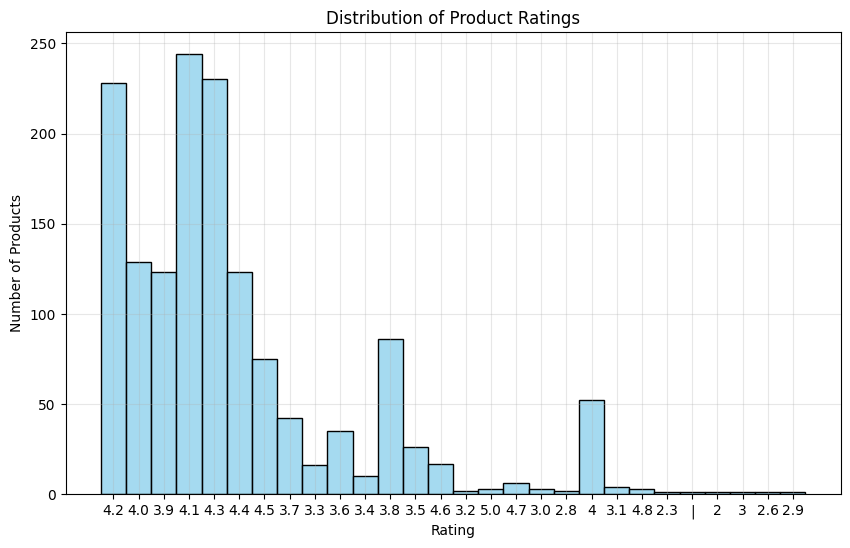

In [141]:
#Show the distribution of ratings using a histogram in python
#Re-read the data and create histogram
df = pd.read_csv('cleaned_data.csv')

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='rating', bins=10, color='skyblue')

#Customize plot appearance
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Products')
plt.grid(True, alpha=0.3)

plt.show()


In [152]:
df['discount_percentage'].head(10)

0    64.0
1    43.0
2    90.0
3    53.0
4    61.0
5    85.0
6    65.0
7    23.0
8    50.0
9    33.0
Name: discount_percentage, dtype: float64

In [154]:
# Convert columns to numeric and calculate correlation
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Calculate correlation coefficient
corr = df['discount_percentage'].corr(df['rating'])
print(f"Correlation: {corr:.2f}")

Correlation: -0.16


In [145]:
#Get top categories by review count
top_categories = df.groupby('category')['rating_count'].sum().sort_values(ascending=False).head()

print("\nTop Selling Categories:")
for i, (category, count) in enumerate(top_categories.items(), 1):
    print(f"{i}. {category}: {count:,} reviews")


Top Selling Categories:
1. Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear: 4,204,939 reviews
2. Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables: 3,584,406 reviews
3. Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones: 2,493,269 reviews
4. Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables: 1,906,054 reviews
5. Electronics|WearableTechnology|SmartWatches: 1,644,476 reviews


Analyze the relationship between discount and rating_count. 



Weak Negative Correlation: The weak negative correlation between discount percentage and rating (-0.16) suggests that higher discounts do not necessarily lead to better product ratings. This indicates that customers might perceive heavily discounted products as lower quality or less valuable.


7. Data Visualization

C:\Users\dell\AppData\Local\Temp\ipykernel_13184\2590171843.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


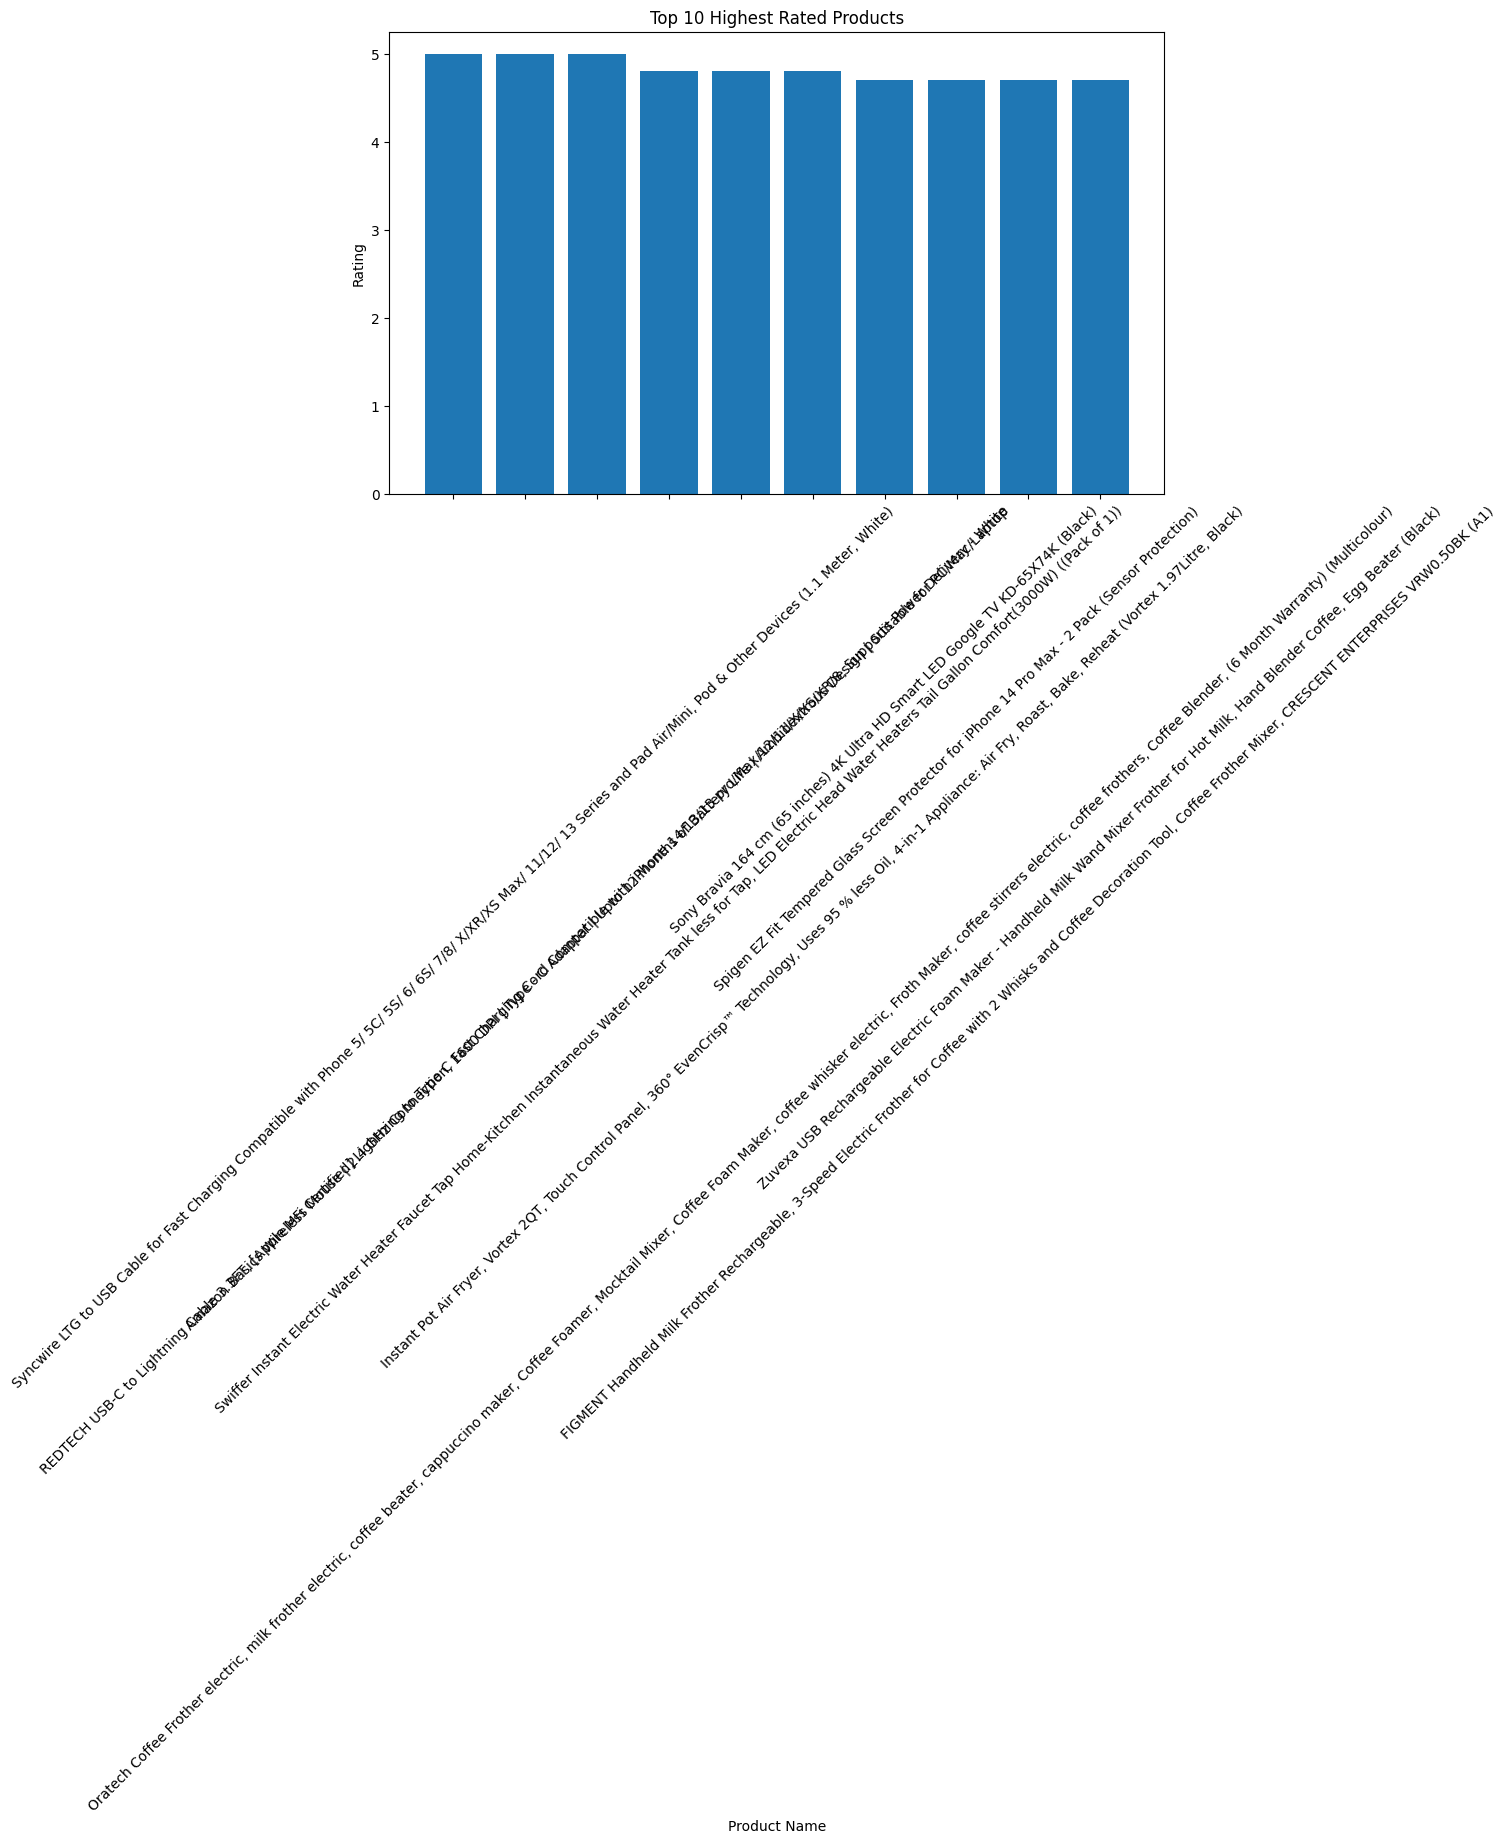

In [ ]:
#Create a bar chart showing the top 10 highest-rated products.

top_10 = df.nlargest(10, 'rating')

plt.figure(figsize=(10, 6))
plt.bar(range(10), top_10['rating'])
plt.xticks(range(10), top_10['product_name'], rotation=45)

plt.title('Top 10 Highest Rated Products')
plt.xlabel('Product Name')
plt.ylabel('Rating')

plt.tight_layout()
plt.show()

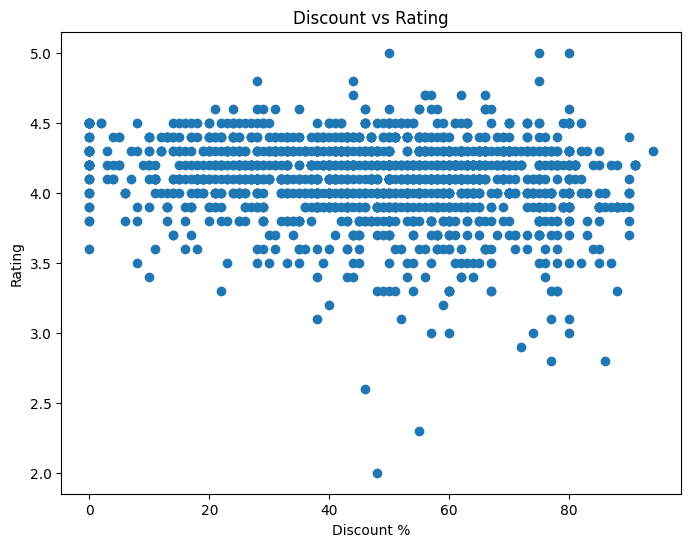

In [156]:
#Plot a scatter plot of discount_percentage vs rating. 
plt.figure(figsize=(8, 6))
plt.scatter(df['discount_percentage'], df['rating'])

plt.title('Discount vs Rating')
plt.xlabel('Discount %')
plt.ylabel('Rating')

plt.show()

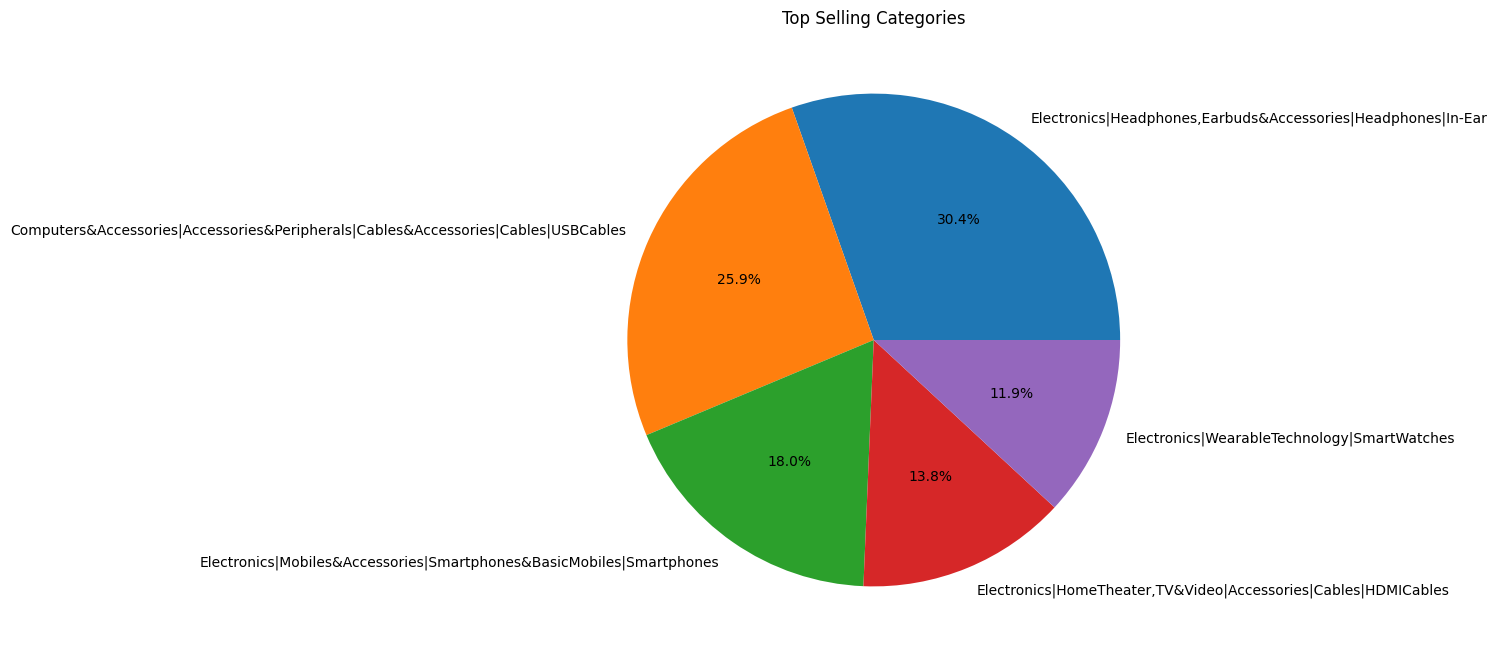

In [159]:
#What are the top category sales 
top_cats = df.groupby('category')['rating_count'].sum().nlargest(5)

#Creating pie chart
plt.figure(figsize=(20, 8))
plt.pie(top_cats.values, labels=top_cats.index, autopct='%1.1f%%')
plt.title('Top Selling Categories')
plt.show()

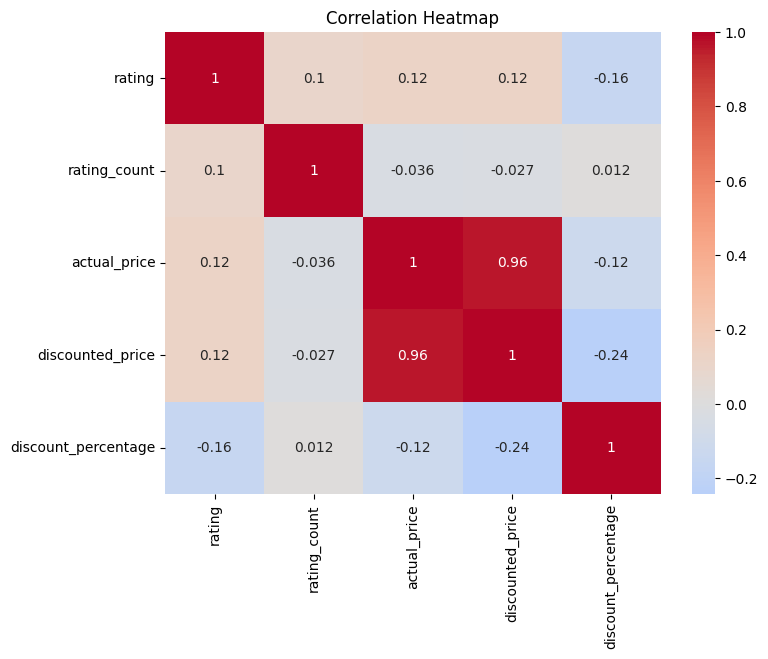

In [161]:
#Select numerical columns
numeric_columns = ['rating', 'rating_count', 'actual_price', 'discounted_price', 'discount_percentage']
correlations = df[numeric_columns].corr()

#Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()